In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report ,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
dataset.shape

(284807, 31)

In [7]:
dataset[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


# Percentage of Total not fraud Transaction

In [8]:
nfcount = 0
df = dataset["Class"]
for i in range(len(df)):
    #AS the value in float so we dont need to put string on 0
    if df[i]== 0:
        nfcount+=1
nfcount
per_nf = (nfcount/len(df))*100
per_nf

99.82725143693798

# Percentage of Total not fraud Transaction


In [9]:
fcount = 0
df = dataset["Class"]
for i in range(len(df)):
    #AS the value in float so we dont need to put string on 0
    if df[i]== 1:
        fcount+=1
nfcount
per_nf = (fcount/len(df))*100
per_nf

0.1727485630620034

Visualizing Fraduelent and non Fraduelent card percentage by pie chart

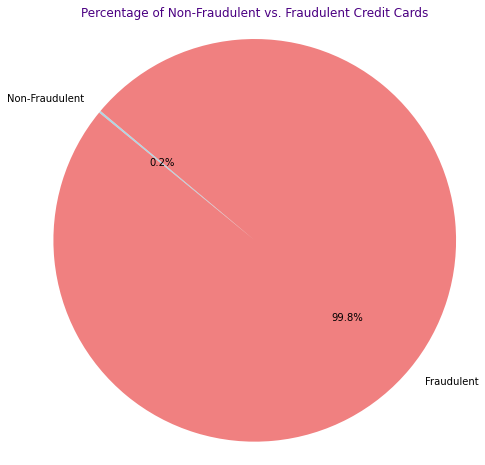

In [10]:
plt.figure(figsize = (8,8))
labels = ['Non-Fraudulent', 'Fraudulent']
sizes = [per_nf,100-per_nf]
colors = ["lightblue","lightcoral"]
plt.pie(sizes,labels = labels,colors = colors,autopct = '%1.1f%%',startangle = 140)
plt.axis("equal")
plt.title('Percentage of Non-Fraudulent vs. Fraudulent Credit Cards',color = "indigo")
plt.show()

# Bar Plot

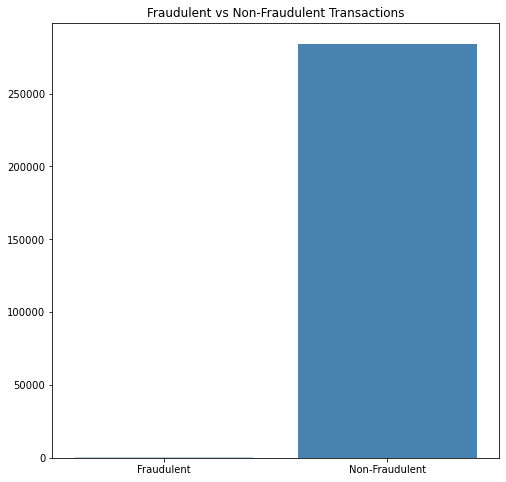

In [68]:

#Create the bar plot
plt.figure(figsize = (8,8))
plt.title("Fraudulent vs Non-Fraudulent Transactions")
sns.barplot(x=["Fraudulent", "Non-Fraudulent"], y=[fcount, nfcount],palette = "Blues")

# Display the plot
plt.show()

Finding at what time most of the fraud happens

In [72]:
hours = np.random.randint(0, 25, size=284807)
hours
dataset["hours"] = hours

In [74]:
time = dataset["hours"]
clas_1 = dataset[dataset["Class"]==1]

In [75]:
fraud_data = pd.DataFrame({"Time":time,"Class":clas_1["Class"]})

In [82]:
fraud_data = fraud_data[fraud_data["Class"].notnull()]

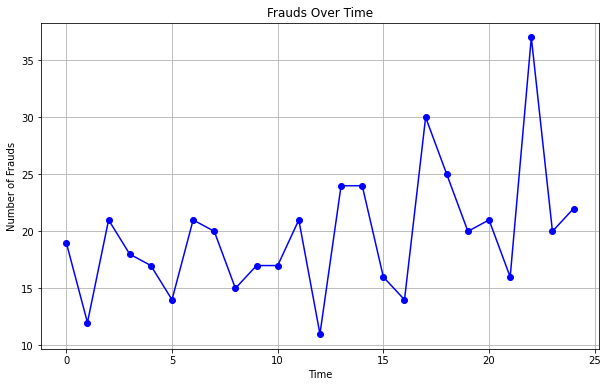

In [83]:
frauds_by_time = fraud_data.groupby('Time')['Class'].sum()

# Create a line chart to visualize frauds over time
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(frauds_by_time.index, frauds_by_time.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Time')
plt.ylabel('Number of Frauds')
plt.title('Frauds Over Time')
plt.grid(True)
plt.show()

# Correlation with all Columns

In [84]:
dataset_2 = dataset.drop(columns = ["Class"])


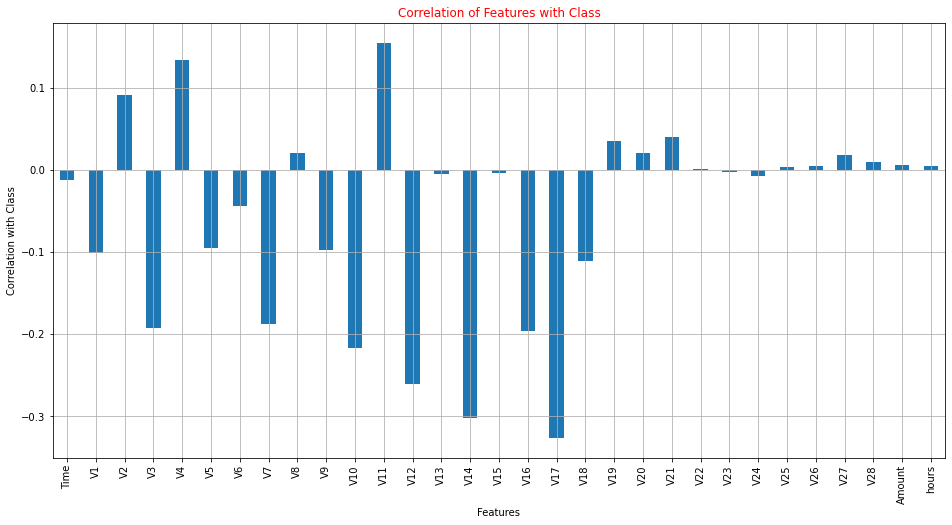

In [85]:
#  Calculate the correlation between each column in 'dataset_2' and the 'Class' column in the original dataset
correlation_with_class = dataset_2.corrwith(dataset["Class"])

# Create a bar plot to visualize the correlation values with the 'Class' column
# Show grid lines in the plot for better readability
correlation_with_class.plot.bar(figsize = (16,8),grid = True)
plt.xlabel("Features")
plt.ylabel("Correlation with Class")
plt.title("Correlation of Features with Class",color = "red")
plt.show()

# Heat Map Or Correlation Matrix

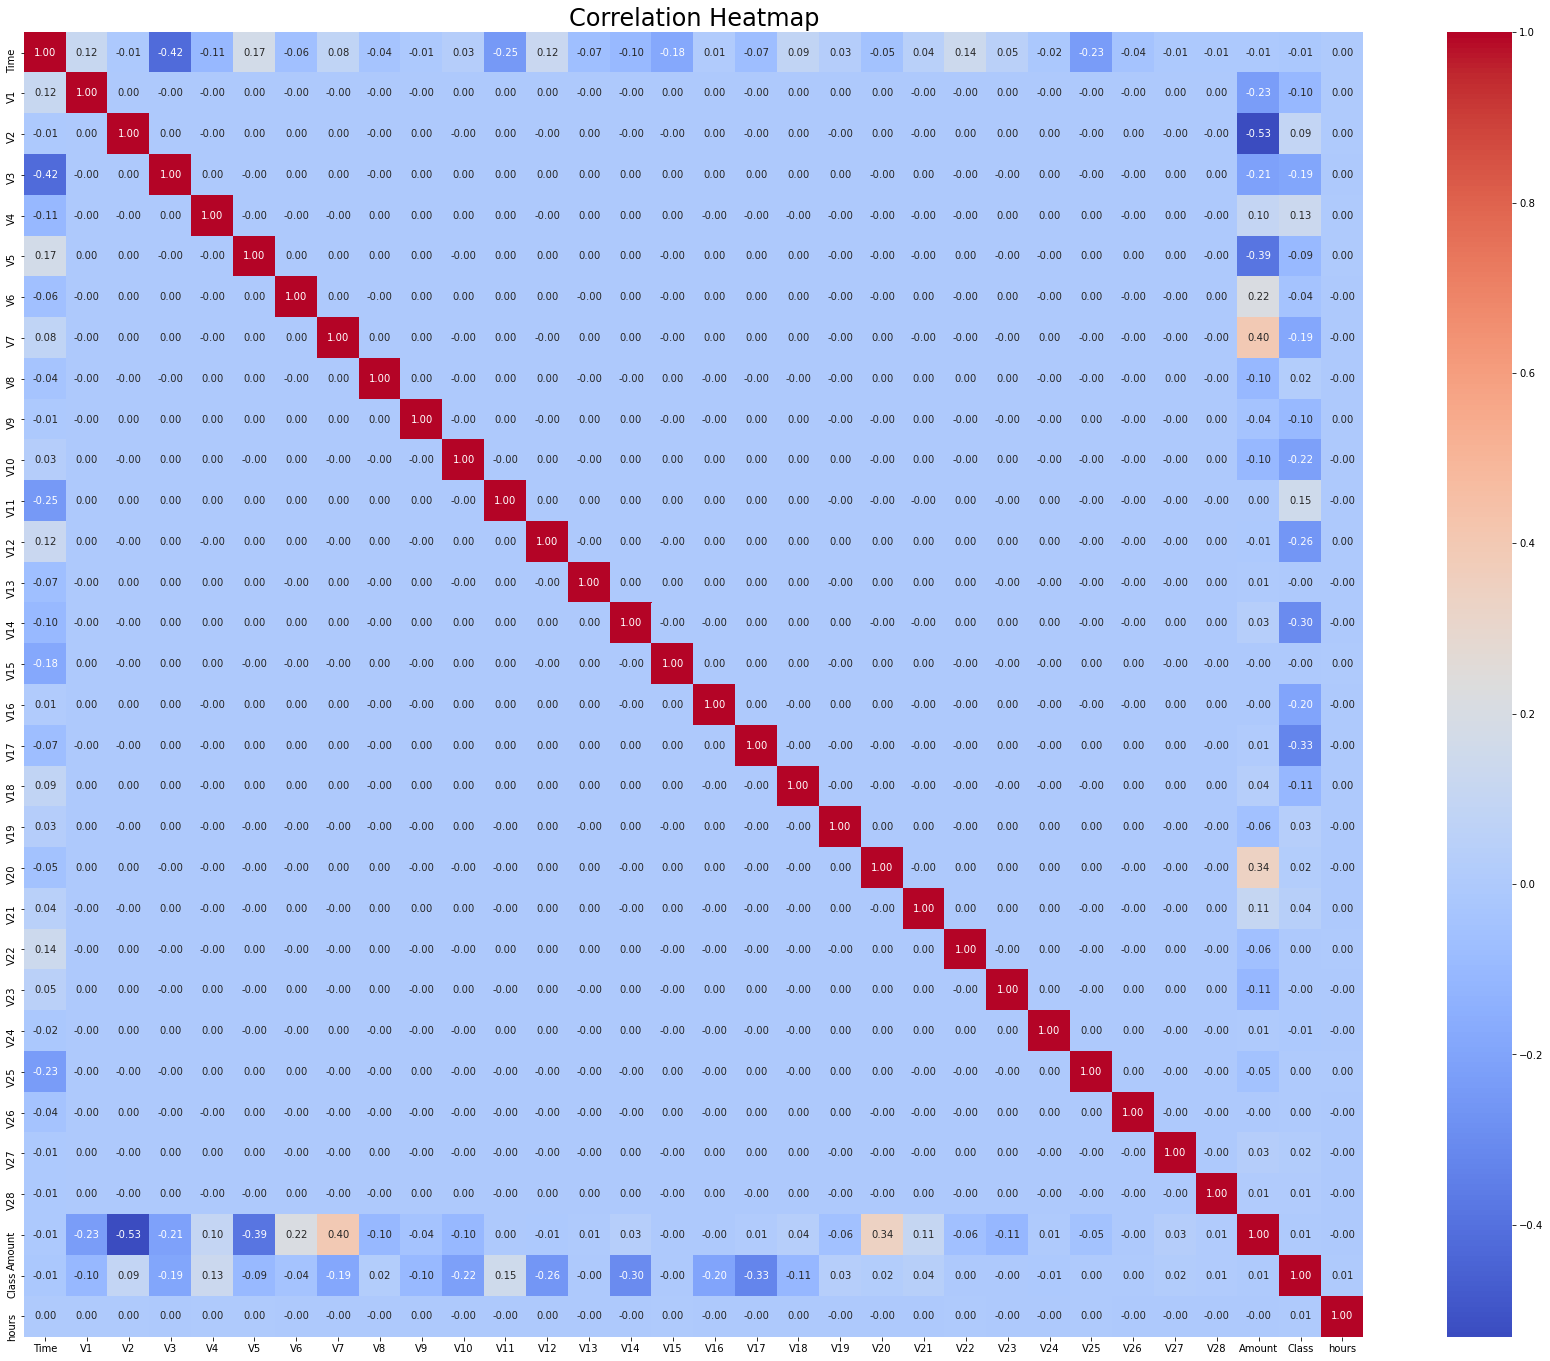

In [86]:
corr = dataset.corr()
plt.figure(figsize = (30,24))
sns.heatmap(corr,annot = True,cmap = "coolwarm",fmt = ".2f")
plt.title("Correlation Heatmap", fontsize=24)
plt.show()

# Checking the distribution of Amount

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Amount Distribution'}, xlabel='Amount', ylabel='Density'>

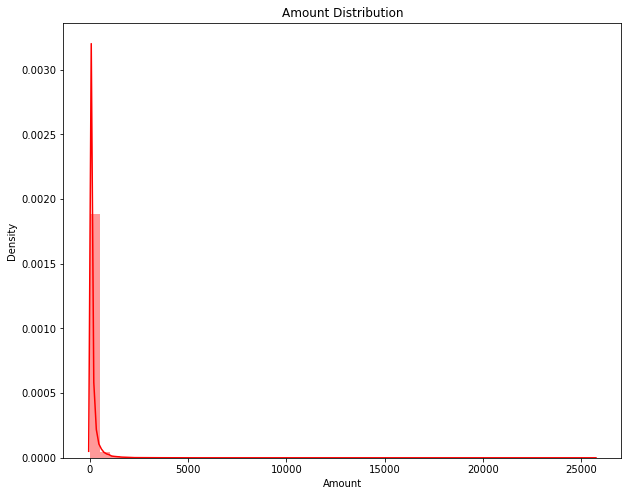

In [87]:
plt.figure(figsize=(10,8))
plt.title("Amount Distribution")
sns.distplot(dataset["Amount"],color = "red")

# Outliers

Checking what amount is outlier in the terms of fraud transaction so we make scatter plot firts

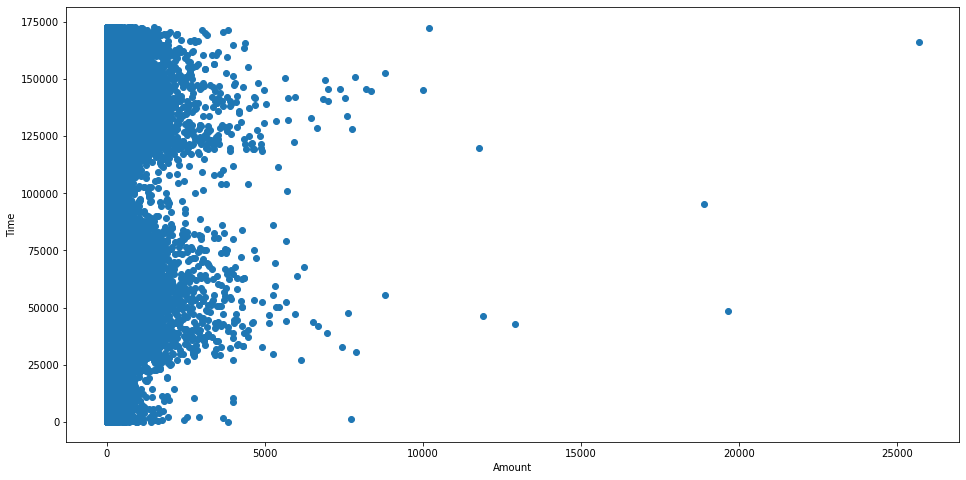

In [88]:
fig,ax = plt.subplots(figsize = (16,8))
ax.scatter(dataset["Amount"],dataset["Time"])
ax.set_xlabel("Amount")
ax.set_ylabel("Time")
plt.show()

Now Implementing LogisticRegression

In [89]:
x = dataset.drop(["Class"],axis = 1)
y = dataset["Class"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.10,random_state = 12)


In [90]:
xtest.shape

(28481, 31)

In [91]:
logisticreg = LogisticRegression()
logisticreg.fit(xtrain,ytrain)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
y_pred = logisticreg.predict(xtest)


In [93]:
accuracy = logisticreg.score(xtest,ytest)
accuracy

0.9991924440855307

In [94]:
pd.DataFrame({"ytest":ytest,"ypred":y_pred})

,ytest,ypred
214164,0,0
10783,0,1
228456,0,0
253376,0,0
243213,0,0
...,...,...
128506,0,0
233254,0,0
264406,0,0
176005,0,0
